<a href="https://colab.research.google.com/github/sp9103/AR3DVision/blob/master/CameraCalib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install opencv-python

In [0]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from os import path
from google.colab.patches import cv2_imshow

In [76]:
from google.colab import drive

path = '/content/gdrive'
drive.mount(path)
path = path + '/My Drive/Calib data/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def calibrate_camera(nx, ny, basepath):
    """

    :param nx: number of grids in x axis
    :param ny: number of grids in y axis
    :param basepath: path contains the calibration images
    :return: write calibration file into basepath as calibration_pickle.p
    """

    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Make a list of calibration images
    images = glob.glob(basepath + '*.PNG')          # <------------------ 수정

    # Step through the list and search for chessboard corners
    idx = 0
    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            if idx % 8 == 0:
                img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
                cv2_imshow(img)
            # cv2.waitKey(500)

        idx += 1

    # cv2.destroyAllWindows()


    # calibrate the camera
    img_size = (img.shape[1], img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

    # Save the camera calibration result for later use (we don't use rvecs / tvecs)
    destnation_mtx = basepath + 'mtx.xml'
    destination_dist = basepath + 'dist.xml'

    fs = cv2.FileStorage(destnation_mtx, cv2.FILE_STORAGE_WRITE)
    fs.write("mtx", mtx)
    fs.write("dist", mtx)
    fs.release()

    print("calibration data is written into: {}".format(destnation_mtx))

    return mtx, dist

    return

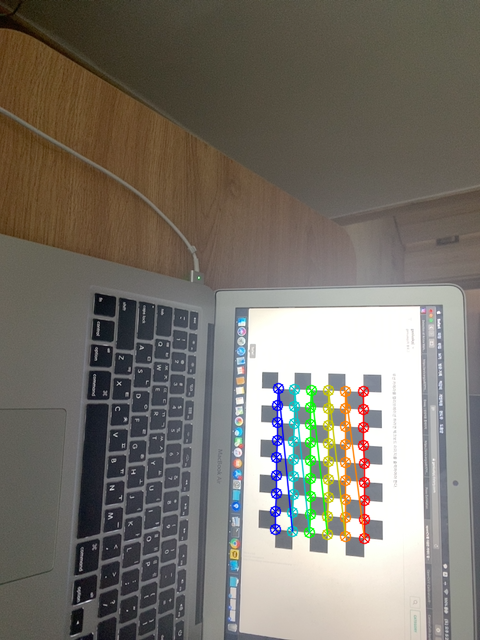

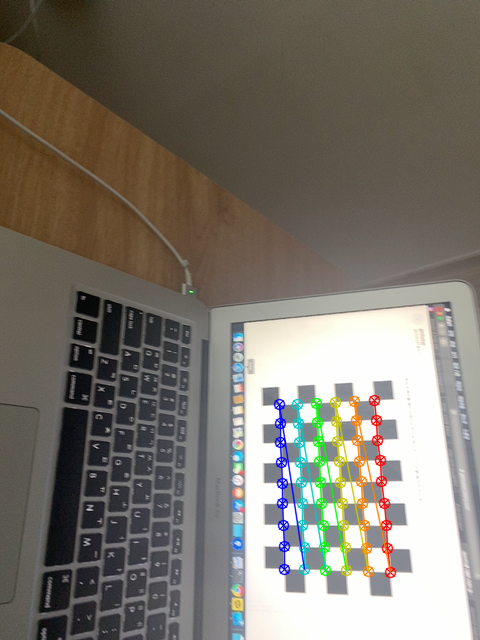

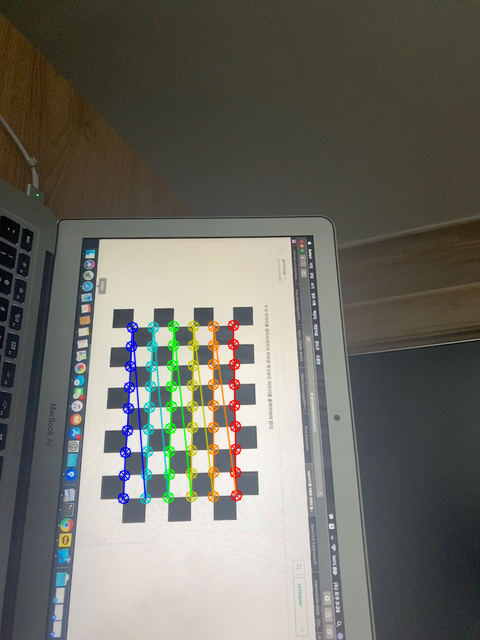

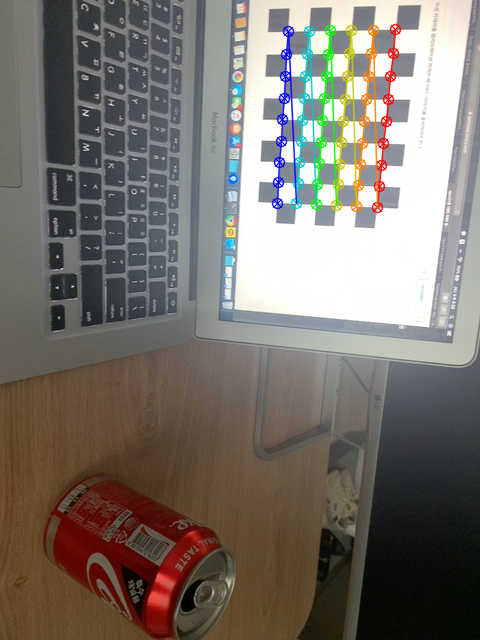

calibration data is written into: /content/gdrive/My Drive/Calib data/mtx.xml


(array([[484.83039619,   0.        , 250.96472195],
        [  0.        , 484.91770679, 319.55464523],
        [  0.        ,   0.        ,   1.        ]]),
 array([[ 2.00361385e-01, -9.27495579e-01, -8.60443558e-04,
          1.55516501e-04,  1.26647492e+00]]))

In [78]:
nx, ny = 9, 6  # number of grids along x and y axis in the chessboard pattern

# calibrate the camera and save the calibration data
calibrate_camera(nx, ny, path)